In [24]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy
import time
import os


In [80]:

#hyper params
num_epoch = 20
cuda_device = -1
batch_size = 140
device = f'cuda:{cuda_device}' if cuda_device != -1 else 'cpu'
input_d = 28*28
hidden_d1 = 128
hidden_d2 = 256
hidden_d3 = 128
out_d = 10

def collate_fn(data):
    pics = []
    targets = []
    # data = [(pic, target), ....]
    for item in data:
        pics.append(numpy.array(item[0]))
        targets.append(item[1])

    return {
        'data': torch.from_numpy(numpy.array(pics)) / 255,
        'target': torch.from_numpy(numpy.array(targets))
    }

#model
class MyModelCNN(nn.Module):
    def __init__(self,
                 in_channels: int,
                 hidden_channels1: int,
                 hidden_channels2: int,
                 hidden_channels3: int,
                 n_classes: int,
                 ):
        super().__init__()
        # TODO change architecture
        # TODO use pooling
        self.pool = nn.AvgPool2d(kernel_size=3, padding=1, stride=1)
        self.conv1 = nn.Conv2d(in_channels, hidden_channels1, kernel_size=5, padding=2, stride=2) # 14 * 14
        # TODO add batchnorm after each conv
        self.bn1 = nn.BatchNorm2d(hidden_channels1)
        self.conv2 = nn.Conv2d(hidden_channels1, hidden_channels2, kernel_size=3, padding=1, stride=1)
        self.bn2 = nn.BatchNorm2d(hidden_channels2)
        self.conv3 = nn.Conv2d(hidden_channels2, hidden_channels3, kernel_size=3, padding=1, stride=1)
        self.bn3 = nn.BatchNorm2d(hidden_channels3)
        self.conv4 = nn.Conv2d(hidden_channels3, 1, kernel_size=1, padding=0, stride=1)
        self.linear1 = nn.Linear(14*14, n_classes, bias=True)

        self.activation = nn.ReLU()

    def forward(self, x):
        print(x.size())
        # plt.imshow(x[0][0])
        # plt.show()
        x = self.pool(x)
        print(x.size())
        # plt.imshow(x[0][0])
        # plt.show()
        x = self.activation(self.bn1(self.conv1(x)))
        x = self.activation(self.bn2(self.conv2(x)))
        x = self.activation(self.bn3(self.conv3(x)))
        x = self.activation(self.bn4(self.conv4(x)))
        x = self.activation(self.linear1(x.view(x.size(0), -1)))

        return x

# init model
model = MyModelCNN(input_d, hidden_d1, hidden_d2, hidden_d3, out_d)
model = model.to(device)

#optimizer
optim = torch.optim.Adam(model.parameters(), lr=0.001)

#lr scheduler

#dataset
dataset = datasets.MNIST(os.getcwd(), download=False)

#
# import matplotlib.pyplot as plt
# plt.imshow(dataset.data[0].detach().numpy())
# plt.show()
#loss
criterion = nn.CrossEntropyLoss()

time_start = time.time()

# train loop
for epoch in range(num_epoch):
    #dataloder
    data_loader = DataLoader(dataset=dataset,
                             batch_size=batch_size,
                             shuffle=True,
                             collate_fn=collate_fn,
                             drop_last=True,
                             )
    for i, batch in enumerate(data_loader):
        optim.zero_grad()
        data = batch['data'].to(device).float()
        predict = model(data.unsqueeze(1))
        loss = criterion(predict, batch['target'].to(device))
        loss.backward()
        optim.step()
        if i % 100000:
            print('    ' + str(loss))

print('Обучение завершилось за: ' + time.strftime('%H:%M:%S', time.gmtime(time.time() - time_start)))

torch.Size([140, 1, 28, 28])
torch.Size([140, 1, 28, 28])


RuntimeError: Given groups=1, weight of size [128, 784, 5, 5], expected input[140, 1, 28, 28] to have 784 channels, but got 1 channels instead

In [71]:
data.size()

torch.Size([140, 28, 28])

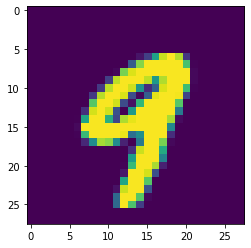

In [73]:
import matplotlib.pyplot as plt
plt.imshow(x[0])
plt.show()